In [1]:
import os
from PIL import Image
import torch
from torchvision import transforms
import random
import matplotlib.pyplot as plt
from dataset_loader import MedicalDataset

In [2]:
def visualize_tensor(image_tensor, mask_tensor, metadata):
    """
    Visualize a grayscale image and binary mask from PyTorch tensors.

    Args:
        image_tensor (torch.Tensor): Grayscale image tensor (H x W).
        mask_tensor (torch.Tensor): Binary mask tensor (H x W).
    """
    # Ensure tensors are detached and converted to numpy
    image_np = image_tensor.squeeze(0).numpy()  # Remove the singleton dimension
    mask_np = mask_tensor.squeeze(0).numpy()    # Remove the singleton dimension

    scan_type = metadata['scan_type']
    patient_id = metadata['patient_id']

    # Convert tensors to PIL images
    image_pil = Image.fromarray((image_np * 255).astype('uint8')).convert('L')  # Scale image to 0-255
    mask_pil = Image.fromarray((mask_np * 255).astype('uint8')).convert('L')    # Binary mask

    # Plot the images
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))

    # Display scan image on the left
    axes[0].imshow(image_pil, cmap='gray')
    axes[0].set_title(f"MRI (scan: {scan_type}) Image")

    # Display scan image with tumor overlay on the right
    axes[1].imshow(image_pil, cmap='gray', extent=[0, 256, 0, 256])  # Define bounds
    axes[1].imshow(mask_pil, cmap='jet', alpha=0.5, extent=[0, 256, 0, 256])  # Match bounds
    axes[1].set_xlim(0, 256)  # Explicitly set x-axis limits
    axes[1].set_ylim(0, 256)  # Explicitly set y-axis limits
    axes[1].set_title(f'MRI (scan: {scan_type}) + Tumor Overlay')

    plt.tight_layout()
    plt.show()

In [4]:
files = os.listdir(os.getcwd())
print(files)

dataset_paths = []

for file in files:
    if file == 'configuration' or file == '.ipynb_checkpoints':
        continue
    if not os.path.isdir(file):
        continue 
    dataset_paths.append(os.path.join(os.getcwd(), file))

dataset_paths = ['/scratch/project_2011942/UPENN-GBM', '/scratch/project_2011942/UCSF', '/scratch/project_2011942/BraTS', '/scratch/project_2011942/LGG']
print(dataset_paths)

['mask_segmentations.json', 'configuration', 'extract_segmentation_flags.ipynb', 'UPENN-GBM', 'dataset_loader.ipynb', 'UCSF', '.ipynb_checkpoints', 'BraTS', 'LGG']
['/scratch/project_2011942/UPENN-GBM', '/scratch/project_2011942/UCSF', '/scratch/project_2011942/BraTS', '/scratch/project_2011942/LGG']


In [5]:
# Initialize dataset
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
dataset = MedicalDataset(dataset_paths, transform=transform)

Dataset /scratch/project_2011942/UPENN-GBM loaded with 378820 images and 611 patients
Dataset /scratch/project_2011942/UCSF loaded with 306900 images and 495 patients
Dataset /scratch/project_2011942/BraTS loaded with 89900 images and 145 patients
Dataset /scratch/project_2011942/LGG loaded with 16246 images and 159 patients
Loaded 1410 patients.
Loaded 589838 image-mask pairs for image-level training.
Loaded 1410 patients for patient-level training.
Found 82143 masks with tumor present, and 119885 masks with tumor not present. Ratio: 0.40659215554279604
Found 241801 image-mask pairs with tumor present and 348037 image-mask pair with tumor not present. Ratio 0.40994476449465783


Switched to 'image' mode: 589838 image-mask pairs available. Ratio: None
Image-level training:
Image shape: torch.Size([1, 240, 240]), Mask shape: torch.Size([1, 240, 240]), Metadata: {'patient_id': 'UPENN-GBM-00469_11', 'scan_type': 'FLAIR', 'segmentation_flag': 1}
Unique values in image: tensor([0.0000, 0.0039, 0.0118, 0.0157, 0.0235, 0.0314, 0.0353, 0.0431, 0.0510,
        0.0549, 0.0627, 0.0706, 0.0745, 0.0824, 0.0902, 0.0941, 0.1020, 0.1098,
        0.1137, 0.1216, 0.1255, 0.1333, 0.1412, 0.1529, 0.1569, 0.1647, 0.1725,
        0.1804, 0.1843, 0.1882, 0.2000, 0.2039, 0.2118, 0.2196, 0.2314, 0.2353,
        0.2431, 0.2510, 0.2549, 0.2627, 0.2706, 0.2784, 0.2824, 0.2863, 0.2941,
        0.3020, 0.3098, 0.3137, 0.3176, 0.3294, 0.3333, 0.3412, 0.3490, 0.3608,
        0.3686, 0.3725, 0.3804, 0.3882, 0.3922, 0.4000, 0.4078, 0.4118, 0.4196,
        0.4275, 0.4314, 0.4392, 0.4431, 0.4510, 0.4588, 0.4627, 0.4706, 0.4745,
        0.4824, 0.4902, 0.4980, 0.5020, 0.5098, 0.5137, 0.5216, 0.529

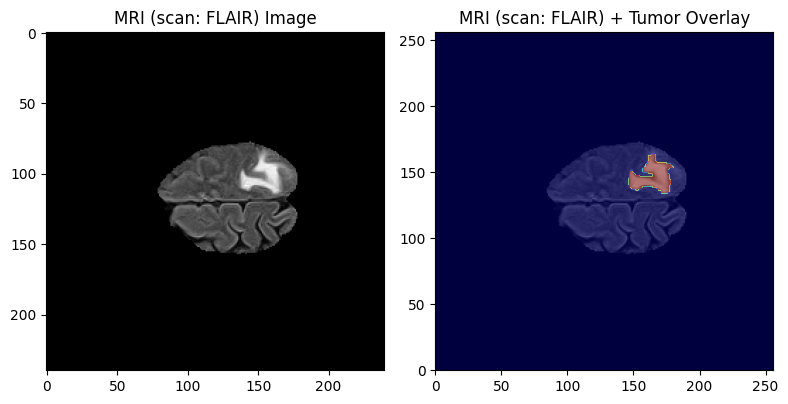

In [12]:
# Switch to image-level mode
dataset.change_mode('image')

# Access data in image-level mode
idx = random.randint(0, 589837)
image, mask, metadata = dataset[idx]
print("Image-level training:")
print(f"Image shape: {image.shape}, Mask shape: {mask.shape}, Metadata: {metadata}")
print(f"Unique values in image: {torch.unique(image)}")
print(f"Unique values in mask: {torch.unique(mask)}")

visualize_tensor(image, mask, metadata)

# image_dataloader = DataLoader(image_level_dataset, batch_size=32, shuffle=True)

In [8]:
dataset.set_segmentation_ratio(0.5)

Filtered dataset contains 241801 image-mask pairs with tumor present and 241801 image-mask pairs with no tumor present, ratio: 0.5


Switched to 'patient' mode: Data available for 1410 patients. Ratio: None
Patient-level training:
Image shape: torch.Size([1, 256, 256]), Mask shape: torch.Size([1, 256, 256]), Metadata: {'patient_id': 'LGG-337', 'scan_type': 'T2', 'segmentation_flag': 1}
Unique values in image: tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,


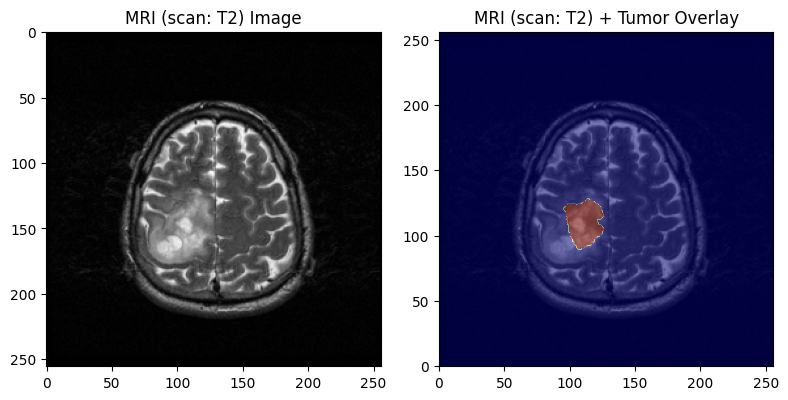

In [9]:
# Switch to patient-level mode
dataset.change_mode('patient')

# Access data in patient-level mode
idx = random.randint(0, 1409)
image, mask, metadata = dataset[idx]
print("Patient-level training:")
print(f"Image shape: {image.shape}, Mask shape: {mask.shape}, Metadata: {metadata}")
print(f"Unique values in image: {torch.unique(image)}")
print(f"Unique values in mask: {torch.unique(mask)}")

visualize_tensor(image, mask, metadata)

# patient_dataloader = DataLoader(patient_level_dataset, batch_size=1, shuffle=True)

In [13]:
dataset.set_segmentation_ratio(0.2)

Filtered data contains 282 patients with tumor present and 1128 patients with no tumor present, ratio: 0.2
